<a href="https://colab.research.google.com/github/thecrazyphysicist369/Amnesic-Flooding/blob/main/Amnesiac_Flooding_with_hops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd

In [ ]:
#vertex generator generates each individual with their properties
def gen_vertex(n,percent):
    ver_list=[]
    c=0

    for i in range(n):
      vertex = {
                'index': c, 			# the unique index of the voter
                'connected': [] ,  # the small world connections between the individuals
                'memory': [], 
                'generator' : random.randint(0,percent) ,
                'msg_sharability' : random.randint(0,10),
                'node_sharability' : 0,
                'mymsg':'0',
                'cur_msg':[]
                }
      ver_list.append(vertex)
      c+=1
    return ver_list

#Generating the Small World Network
def gen_graph(n, k, p,percent):
   population = gen_vertex(n,percent)
   G = nx.watts_strogatz_graph(n, k, p, seed=10)
   neighbor = []
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))
   	neighbor.append(neighbours)
   for i in range(n):
     population[i]['connected'] = neighbor[i]
     population[i]['index'] = int(i)
     population[i]['node_sharability'] = random.randint(0,k)
   return population



In [ ]:
 '''
this function generates and returns a list of msgs of strings. 

'''
def msgList():
  list1=[]
  for i in range(60,123) :
    for j in range(60,123) :
      p=chr(i)+chr(j)
      list1.append(p)
  return list1


In [ ]:
'''
this function randomly chooses from the list of msg and assigns it to one of the nodes that are generators 
'''
def  msgGeneration(population):
  dict={}
  list1=msgList()
  for i in population:
    if(i['generator']==1 ):
      l=random.randint(0,len(list1)-1)
      dict[list1[l]]=0
      i['mymsg']=list1[l]
      list1.pop(l)
  #print(len(list1))
  return dict


#population



In [ ]:
def avgHopsCalc(population,k,dict):
  nxt=[]
  cur=[]
  for node in population:
    if(node['generator']==1 ):
      #print(node['index'])
      nxt.append(node['index'])
      node['cur_msg'].append(node['mymsg'])
  
  
  round=0
  while(True):
    #print(nxt)
    if(len(nxt)==0):
      break
    cur=nxt
    nxt=[]
    
    round=round+1
    for el in cur:
      for adj in population[el]['connected']:
        flag=0
        for msg in population[el]['cur_msg']:
          dict[msg]+=1
          if(msg in population[adj]['memory']):
            #print("pass"," ",msg," ",el," ",adj)
            continue
          if(len(population[adj]['memory'])>=k):
            flag=1
            population[adj]['memory'].pop(0)
            population[adj]['cur_msg'].append(msg)
            #print(el," ",adj," ",population[adj]['cur_msg']," memm---",population[adj]['memory'])
            population[adj]['memory'].append(msg)
          else:
            flag=1
            population[adj]['cur_msg'].append(msg)
            population[adj]['memory'].append(msg)
           # print("gyyygyg--- ",el," ",adj," ",population[adj]['cur_msg']," memm---",population[adj]['memory'])

        if(flag==1):
          if(adj not in nxt):
            nxt.append(adj)
      population[el]['cur_msg']=[]
      
      #print(round)
      sum=0
      for keys in dict:
        sum=sum+dict[keys]
      avg=sum/len(dict)
  print(round)
  return avg







In [ ]:
def user_input(no_nodes,no_of_connected_components,p,percent):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print(g)
  for k in range(g,2*g+5):
    for node in population:
      node['cur_msg']=[]
      node['memory']=[]
    population1=population
    for keys in dict:
      dict[keys]=0
    r=avgHopsCalc(population,k,dict)
    x.append(k)
    y.append(r)
  x_train=np.array(x)
  y_train=np.array(y)
  #print(g)
  plt.plot(x_train, y_train)
  plt.xlabel("memory_assigned_to_each_node")
  plt.ylabel("avg_hops")
  plt.show()
#population


10
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


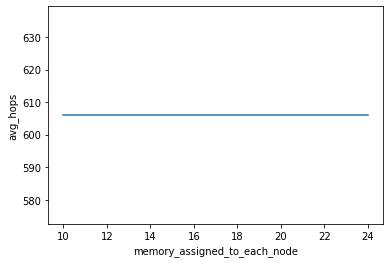

In [ ]:
user_input(100,6,.3,8)